# Analysis of Relationships Between Variables: Linear Regression


### Earthquake Epicenters in Fiji Region

This task visualizes the distribution of earthquake epicenters (magnitude > 4.0) recorded in the Fiji region since 1964 using longitude and latitude data.

,lat,long,depth,mag,stations
,<dbl>,<dbl>,<int>,<dbl>,<int>
1,-20.42,181.62,562,4.8,41
2,-20.62,181.03,650,4.2,15
3,-26.00,184.10,42,5.4,43
4,-17.97,181.66,626,4.1,19
5,-20.42,181.96,649,4.0,11
6,-19.68,184.31,195,4.0,12


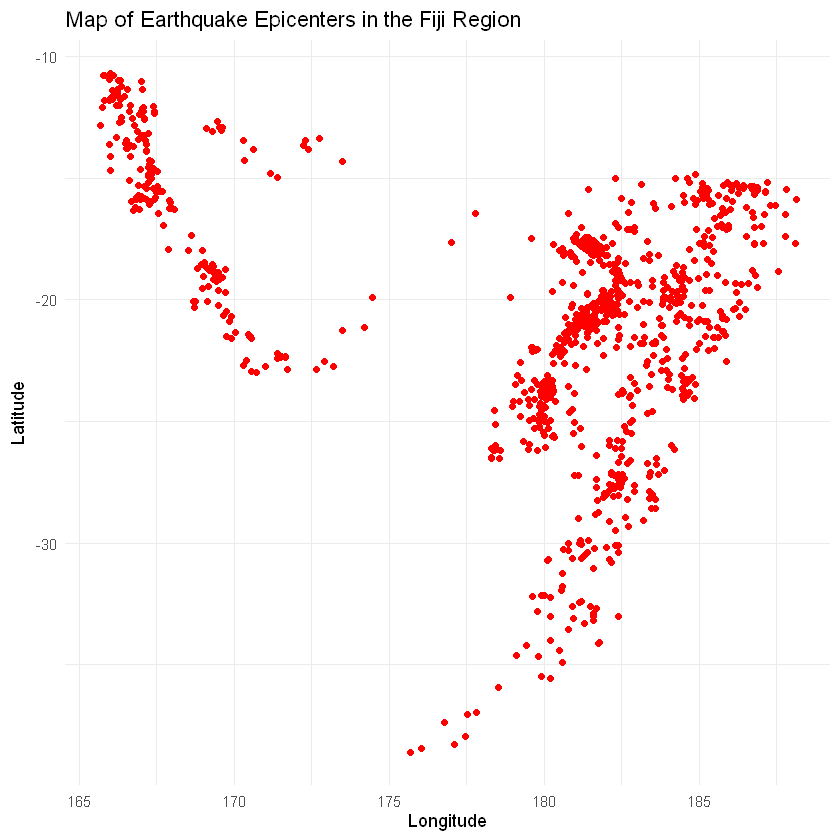

In [3]:
library(ggplot2)
data(quakes)

head(quakes)

ggplot() +
  geom_point(data = quakes, aes(x = long, y = lat), color = "red") +
  labs(title = "Map of Earthquake Epicenters in the Fiji Region",
       x = "Longitude",
       y = "Latitude") +
  theme_minimal()

### Relationship Between Earthquake Magnitude and Number of Recording Stations

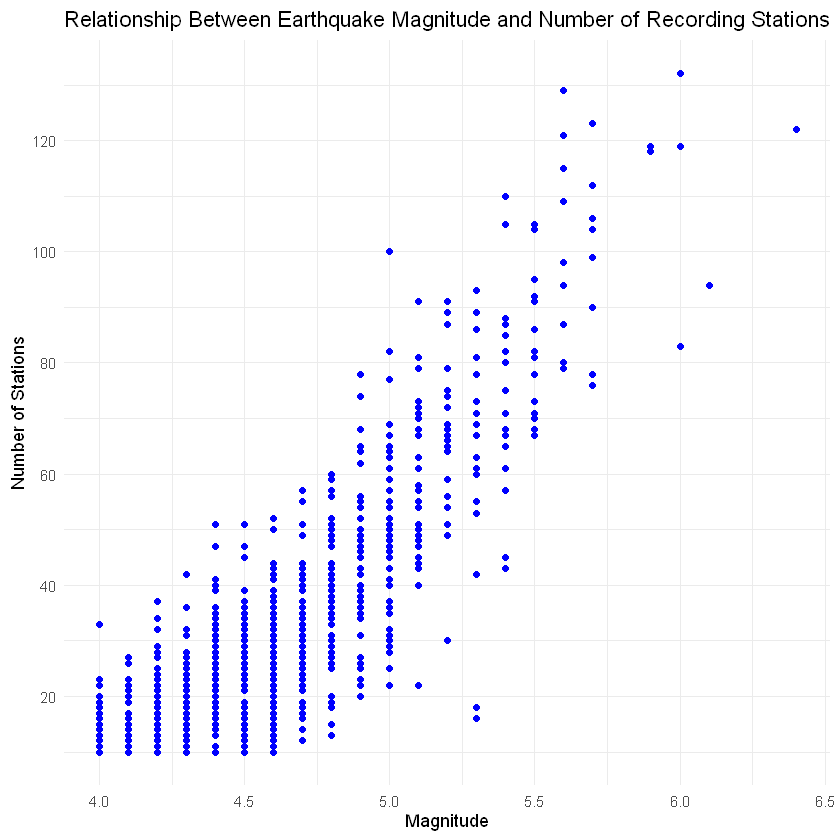

In [4]:
ggplot(quakes, aes(x = mag, y = stations)) +
  geom_point(color = "blue") +
  labs(title = "Relationship Between Earthquake Magnitude and Number of Recording Stations",
       x = "Magnitude",
       y = "Number of Stations") +
  theme_minimal() +
  scale_y_continuous(breaks = seq(0, max(quakes$stations), by = 20))

### Scatter Plot with Added Random Noise to Earthquake Magnitude Values

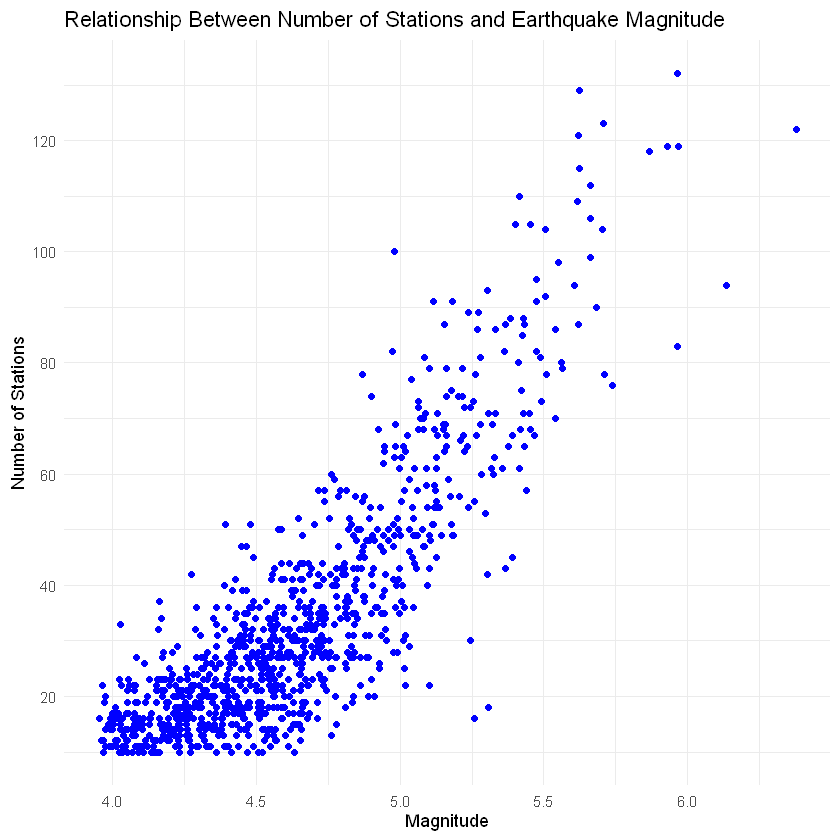

In [5]:
quakes$noisy_mag <- jitter(quakes$mag, amount = 0.05)

ggplot(quakes, aes(x = noisy_mag, y = stations)) +
  geom_point(color = "blue") +
   labs(title = "Relationship Between Number of Stations and Earthquake Magnitude",
       x = "Magnitude",
       y = "Number of Stations") +
  theme_minimal() +
  scale_y_continuous(breaks = seq(0, max(quakes$stations), by = 20))

### Statistical Summary of Noisy Magnitudes

In [6]:
summary_stats <- c(
  suma = sum(quakes$noisy_mag),
  srednia = mean(quakes$noisy_mag),
  mediana = median(quakes$noisy_mag),
  wariancja = var(quakes$noisy_mag),
  odchylenie_std = sd(quakes$noisy_mag),
  min = min(quakes$noisy_mag),
  max = max(quakes$noisy_mag)
)

summary_stats


suma        srednia        mediana      wariancja odchylenie_std 
  4618.9351970      4.6189352      4.5586491      0.1616111      0.4020089 
           min            max 
     3.9566362      6.3758784

### Analysis of Magnitudes and Their Relationship to Station Counts

This analysis computes the 25th, 50th (median), and 75th percentiles along with the interquartile range (IQR) of noisy magnitudes. It also visualizes magnitudes using a boxplot and calculates the covariance and correlation between earthquake magnitude and the number of stations recording the events.

25%      50%      75% 
4.317631 4.558649 4.851441

[1] 0.5338094

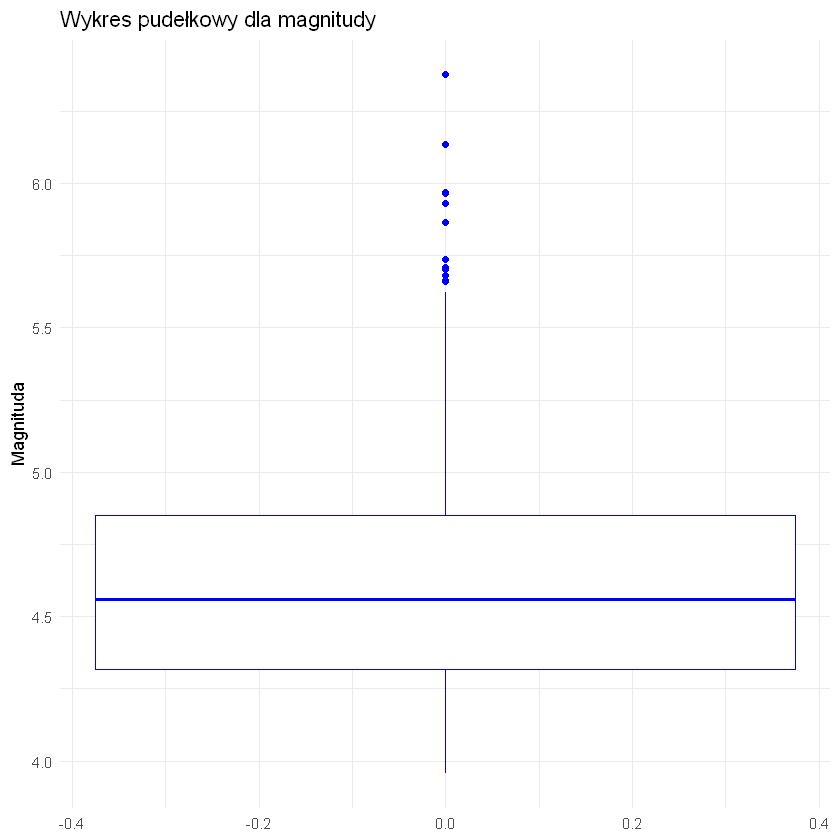

In [7]:
quartiles <- quantile(quakes$noisy_mag, c(0.25, 0.50, 0.75))
IQR <- IQR(quakes$noisy_mag)

quartiles
IQR

ggplot(quakes, aes(y = noisy_mag)) +
  geom_boxplot(color = "blue") +
  labs(title = "Wykres pudełkowy dla magnitudy",
       y = "Magnituda") +
  theme_minimal()



In [8]:
covariance <- cov(quakes$mag, quakes$stations)
covariance

correlation <- cor(quakes$mag, quakes$stations)
correlation

[1] 7.508181

[1] 0.8511824

### Linear Regression Analysis of Magnitude and Station Count

This task involves creating a linear regression model to analyze whether an increase in earthquake magnitude correlates with the number of stations recording the event. The scatter plot includes a regression line to visualize this relationship

In [11]:
model <- lm(stations ~ mag, data = quakes)
summary(model)


Call:
lm(formula = stations ~ mag, data = quakes)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.871  -7.102  -0.474   6.783  50.244 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -180.4243     4.1899  -43.06   <2e-16 ***
mag           46.2822     0.9034   51.23   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.5 on 998 degrees of freedom
Multiple R-squared:  0.7245,	Adjusted R-squared:  0.7242 
F-statistic:  2625 on 1 and 998 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


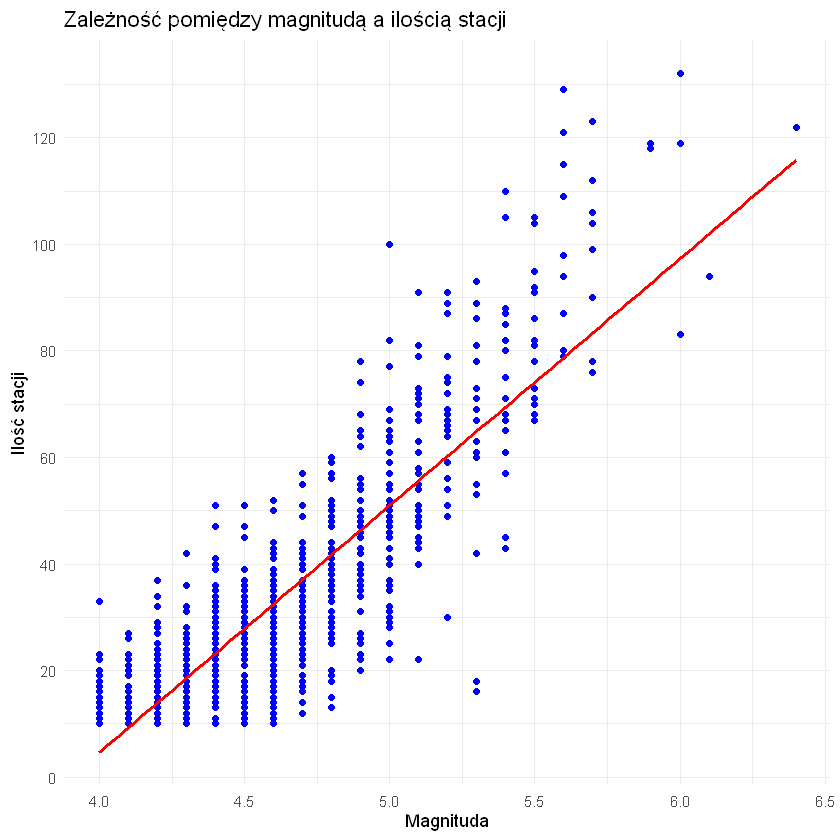

In [12]:

ggplot(quakes, aes(x = mag, y = stations)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", se = FALSE, color = "red") + # Dodanie lini regresji
  labs(title = "Zależność pomiędzy magnitudą a ilością stacji",
       x = "Magnituda",
       y = "Ilość stacji") +
  theme_minimal() +
  scale_y_continuous(breaks = seq(0, max(quakes$stations), by = 20))


###  Model Evaluation Metrics for Linear Regression

This task calculates key evaluation metrics for the linear regression model, including the Residual Sum of Squares (RSS), Residual Standard Error (RSE), Proximity Coefficient (φ²), and the Coefficient of Determination (R²) to assess the model's performance and fit.

In [16]:
rss <- sum(residuals(model)^2)
rse <- sqrt(rss / (model$df.residual))
total_variance <- sum((quakes$stations - mean(quakes$stations))^2)
phi_sq <- rss / total_variance

r_squared <- 1 - phi_sq
metrics <- data.frame(
  Metric = c("Residual Sum of Squares (RSS)", 
             "Residual Standard Error (RSE)", 
             "Proximity Coefficient (φ²)", 
             "Coefficient of Determination (R²)"),
  Value = round(c(rss, rse, phi_sq, r_squared), 5)
)


print(metrics)

                             Metric        Value
1     Residual Sum of Squares (RSS) 131999.55660
2     Residual Standard Error (RSE)     11.50061
3        Proximity Coefficient (φ²)      0.27549
4 Coefficient of Determination (R²)      0.72451
